In [1]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import seaborn as sns
# ML and PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
lem1 = pd.read_csv("../data/MS/Lemon_sample_1.csv", header=None)
# lem1 = pd.read_csv('./Lemon_sample_1.csv')
lem1.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

lime2 = pd.read_csv("../data/MS/Lime_sample_2.csv", header=None)
# lime2 = pd.read_csv("./Lime_sample_2.csv", header=None)
lime2.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

or3 = pd.read_csv("../data/MS/Orange_sample_3.csv", header=None)
# or3 = pd.read_csv("./Orange_sample_3.csv", header=None)
or3.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

tom4 = pd.read_csv("../data/MS/Tomato_sample_4.csv", header=None)
# tom4 = pd.read_csv("./Tomato_sample_4.csv", header=None)
tom4.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

In [3]:
def plot_ms(df, ulim=400):

    no_plots = df.shape[1]-1

    fig, ax = plt.subplots(no_plots,1, figsize=(5,10))

    if no_plots == 1:
        i = df.columns[1]
        ax.plot(df.mz, df[i], label=i)
        ax.legend()
        # ax.set_xlim(10,ulim)

    else:
        for k, i in enumerate(df.iloc[:,1:].columns):
            # print(k,i)
            ax[k].plot(df.mz, df[i], label=i)
            ax[k].legend()
            ax[k].set_xlim(10,ulim)
    
    fig.tight_layout()

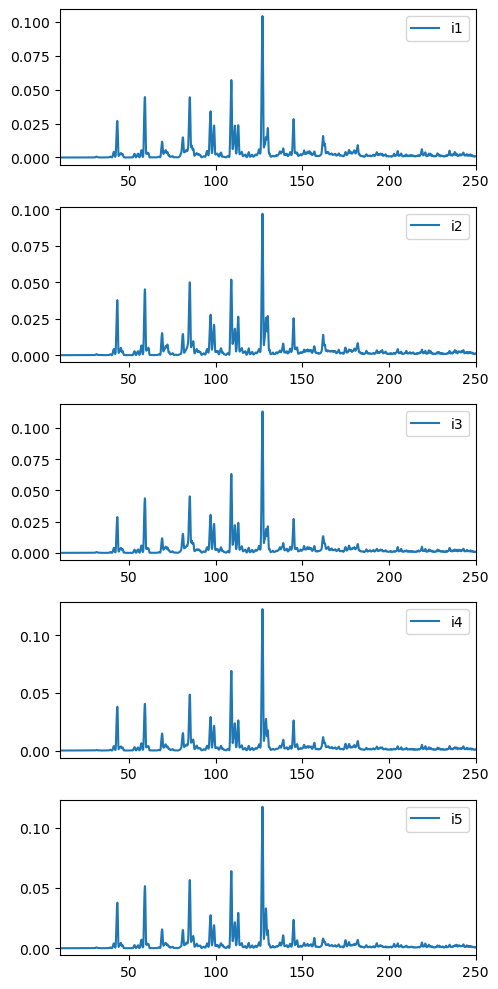

In [4]:
plot_ms(lem1, ulim=250)

In [5]:
# plot_ms(lime2, ulim=250)

In [6]:
# plot_ms(or3, ulim=300)

In [7]:
# plot_ms(tom4, ulim=300)

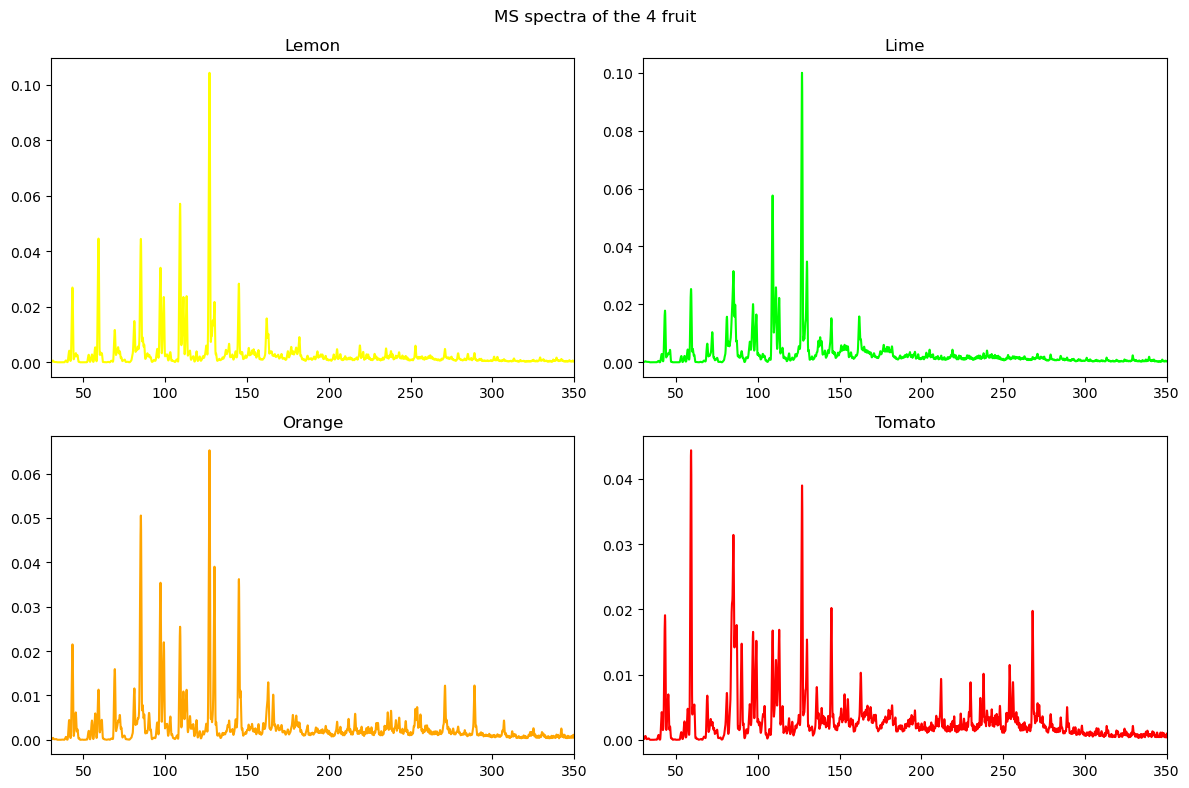

In [8]:
# plot the one spectra of each fruit together

fig, (ax0,ax1) = plt.subplots(2,2,figsize=(12,8))

ax00, ax01 = ax0
ax10, ax11 = ax1

ax00.plot(lem1.mz, lem1.i1, color='yellow')
ax00.set_title('Lemon')
ax00.set_xlim(30,350)

ax01.plot(lime2.mz, lime2.i1, color='lime')
ax01.set_title('Lime')
ax01.set_xlim(30,350)

ax10.plot(or3.mz, or3.i1, color='orange')
ax10.set_title('Orange')
ax10.set_xlim(30,350)

ax11.plot(tom4.mz, tom4.i1, color='red')
ax11.set_title('Tomato')
ax11.set_xlim(30,350)

fig.suptitle('MS spectra of the 4 fruit')
fig.tight_layout()

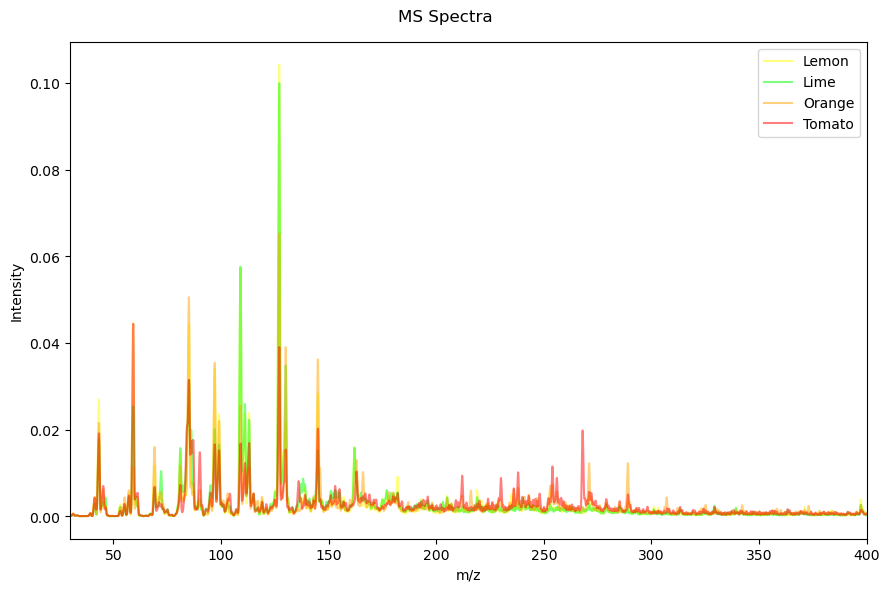

In [9]:
# plot the one spectra of each fruit together

fig, ax = plt.subplots(figsize=(9,6))

alpha=0.5

ax.plot(lem1.mz, lem1.i1, color='yellow', label='Lemon',alpha=alpha)
ax.plot(lime2.mz, lime2.i1, color='lime', label='Lime',alpha=alpha)
ax.plot(or3.mz, or3.i1, color='orange', label='Orange',alpha=alpha)
ax.plot(tom4.mz, tom4.i1, color='red', label='Tomato',alpha=alpha)

ax.legend()
ax.set_xlabel('m/z')
ax.set_ylabel('Intensity')
ax.set_xlim(30,400)

fig.suptitle('MS Spectra')
fig.tight_layout()

In [10]:
home = 'c:\\Users\\Andrew\\Desktop\\Modules\\Y3\\Y3 Sem2\\CHEM6164 AI and ML in Chemistry\\project'
os.chdir(home)
os.chdir(home+'./data/MS')
files = os.listdir()
# files
# os.getcwd()

In [11]:
# merging all data
base = pd.DataFrame([], columns=lem1.index.tolist()+['label'])
# base

for i, f in enumerate(files):
    # if i<2:
        label = f.split('_')[0]
        # print(label)

        input = pd.read_csv(f, header=None)
        input.columns = lem1.columns

        intensities = input.drop(['mz'], axis=1).T
        intensities['label'] = label

        base = pd.concat([base,intensities],axis=0).reset_index(drop=True)

base

,0,1,2,3,4,5,6,7,8,9,...,39769,39770,39771,39772,39773,39774,39775,39776,39777,label
0,0.000009,0.000009,0.000009,0.000008,0.000010,0.000007,0.000008,0.000008,0.000008,0.000008,...,0.000001,0.000001,0.000002,9.681495e-07,2.071736e-06,8.101359e-07,0.000002,1.620275e-06,1.687993e-06,Lemon
1,0.000005,0.000005,0.000005,0.000007,0.000008,0.000005,0.000008,0.000007,0.000007,0.000007,...,0.000002,0.000002,0.000002,1.380807e-06,0.000000e+00,1.997703e-06,0.000002,4.193257e-06,1.900144e-06,Lemon
2,0.000010,0.000010,0.000010,0.000013,0.000011,0.000010,0.000009,0.000009,0.000009,0.000009,...,0.000001,0.000001,0.000001,1.728047e-06,6.839992e-07,1.259683e-06,0.000002,6.478957e-07,1.044051e-06,Lemon
3,0.000006,0.000006,0.000006,0.000008,0.000007,0.000006,0.000004,0.000006,0.000006,0.000006,...,0.000002,0.000002,0.000002,5.687599e-07,2.348353e-06,2.312679e-06,0.000005,2.453402e-06,1.209846e-06,Lemon
4,0.000007,0.000007,0.000007,0.000004,0.000005,0.000005,0.000003,0.000005,0.000005,0.000004,...,0.000002,0.000002,0.000002,1.813078e-06,1.208086e-06,1.536073e-06,0.000002,2.002568e-06,6.732923e-07,Lemon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.000004,0.000004,0.000004,0.000000,0.000009,0.000004,0.000008,0.000006,0.000006,0.000006,...,0.000002,0.000002,0.000002,1.607769e-06,3.909781e-06,1.414922e-06,0.000002,1.376357e-06,2.186300e-06,Tomato
236,0.000007,0.000007,0.000007,0.000004,0.000003,0.000005,0.000005,0.000005,0.000005,0.000006,...,0.000003,0.000002,0.000002,4.501533e-06,0.000000e+00,2.288693e-06,0.000001,0.000000e+00,3.474669e-06,Tomato
237,0.000004,0.000004,0.000004,0.000006,0.000006,0.000002,0.000003,0.000004,0.000004,0.000004,...,0.000003,0.000003,0.000003,2.181133e-06,2.822717e-06,9.159607e-07,0.000004,1.831921e-06,8.910122e-07,Tomato
238,0.000009,0.000009,0.000009,0.000001,0.000010,0.000003,0.000004,0.000005,0.000005,0.000005,...,0.000003,0.000003,0.000002,2.878179e-06,2.718003e-06,1.710508e-06,0.000004,0.000000e+00,9.763385e-07,Tomato


# PCA

In [12]:
# scaling
intensities = base.drop(['label'],axis=1)
intensities.head()

,0,1,2,3,4,5,6,7,8,9,...,39768,39769,39770,39771,39772,39773,39774,39775,39776,39777
0,0.000009,0.000009,0.000009,0.000008,0.000010,0.000007,0.000008,0.000008,0.000008,0.000008,...,0.000002,0.000001,0.000001,0.000002,9.681495e-07,2.071736e-06,8.101359e-07,0.000002,1.620275e-06,1.687993e-06
1,0.000005,0.000005,0.000005,0.000007,0.000008,0.000005,0.000008,0.000007,0.000007,0.000007,...,0.000002,0.000002,0.000002,0.000002,1.380807e-06,0.000000e+00,1.997703e-06,0.000002,4.193257e-06,1.900144e-06
2,0.000010,0.000010,0.000010,0.000013,0.000011,0.000010,0.000009,0.000009,0.000009,0.000009,...,0.000001,0.000001,0.000001,0.000001,1.728047e-06,6.839992e-07,1.259683e-06,0.000002,6.478957e-07,1.044051e-06
3,0.000006,0.000006,0.000006,0.000008,0.000007,0.000006,0.000004,0.000006,0.000006,0.000006,...,0.000002,0.000002,0.000002,0.000002,5.687599e-07,2.348353e-06,2.312679e-06,0.000005,2.453402e-06,1.209846e-06
4,0.000007,0.000007,0.000007,0.000004,0.000005,0.000005,0.000003,0.000005,0.000005,0.000004,...,0.000002,0.000002,0.000002,0.000002,1.813078e-06,1.208086e-06,1.536073e-06,0.000002,2.002568e-06,6.732923e-07


In [13]:
sc = StandardScaler()
sc_intensities = sc.fit_transform(intensities)
print(sc_intensities.shape)
pd.DataFrame(sc_intensities)

(240, 39778)


,0,1,2,3,4,5,6,7,8,9,...,39768,39769,39770,39771,39772,39773,39774,39775,39776,39777
0,1.372097,1.372097,1.372097,1.414152,1.439082,1.023364,1.200636,1.553995,1.519502,1.526753,...,-0.439873,-0.563276,-0.682393,-0.452309,-0.671894,0.499843,-0.838622,-0.981806,0.068246,0.172722
1,-0.513484,-0.513484,-0.513484,0.860956,0.918920,-0.103471,1.431920,0.981029,0.966915,0.829731,...,0.599708,0.181506,0.212109,-0.040227,-0.189872,-1.210250,0.537934,-0.820388,2.274510,0.436152
2,1.792727,1.792727,1.792727,3.085846,2.059943,2.390094,1.471267,2.351990,2.205424,2.069506,...,-0.753170,-0.785864,-0.747698,-0.860555,0.215737,-0.645650,-0.317535,-0.723692,-0.765543,-0.626869
3,0.102800,0.102800,0.102800,1.166509,0.222491,0.709921,-0.172054,0.590266,0.573615,0.528166,...,-0.058457,0.087804,0.467994,0.840998,-1.138419,0.728174,0.903034,1.942350,0.782630,-0.420999
4,0.208229,0.208229,0.208229,-0.188136,-0.332586,0.107735,-0.554244,-0.272072,-0.312488,-0.347987,...,-0.458989,-0.376205,-0.148427,-0.063006,0.315060,-0.213048,0.002840,-0.303929,0.396053,-1.087244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.720713,-0.720713,-0.720713,-1.869780,1.354303,-0.542621,1.218579,0.454564,0.601620,0.639061,...,0.691360,0.772776,0.955801,1.092319,0.075241,2.017038,-0.137591,-0.947413,-0.140907,0.791476
236,0.490865,0.490865,0.490865,-0.494077,-1.241404,0.121898,0.172775,-0.007277,0.127325,0.271072,...,1.629824,1.569066,1.068853,0.942584,3.455426,-1.210250,0.875231,-1.283926,-1.321096,2.391260
237,-1.045284,-1.045284,-1.045284,0.620973,-0.245849,-1.316809,-0.711059,-0.609547,-0.586450,-0.640130,...,2.305397,2.035060,1.901130,1.924117,0.744983,1.119733,-0.715956,0.848726,0.249727,-0.816899
238,1.315563,1.315563,1.315563,-1.468140,1.485813,-0.706817,-0.226309,-0.103719,0.011591,0.173665,...,1.071190,1.526426,1.663524,1.427070,1.559197,1.033297,0.205034,1.124852,-1.321096,-0.710948


In [14]:
# finding ideal no of components for linear PCA
comps = [2,3,5,20,50,100,150,200,240] # 10,15,20,25
variances = []

for n_c in comps:
    pca = PCA(n_components=n_c)
    x = pca.fit_transform(sc_intensities)
    var_ratios = pca.explained_variance_ratio_

    variances.append(var_ratios.sum())

summary = pd.DataFrame([comps, variances]).T
summary.columns = ['n_components','total_var']
summary

,n_components,total_var
0,2.0,0.410434
1,3.0,0.450109
2,5.0,0.502678
3,20.0,0.589379
4,50.0,0.682872
5,100.0,0.802753
6,150.0,0.892990
7,200.0,0.963411
8,240.0,1.000000


(0.0, 240.0)

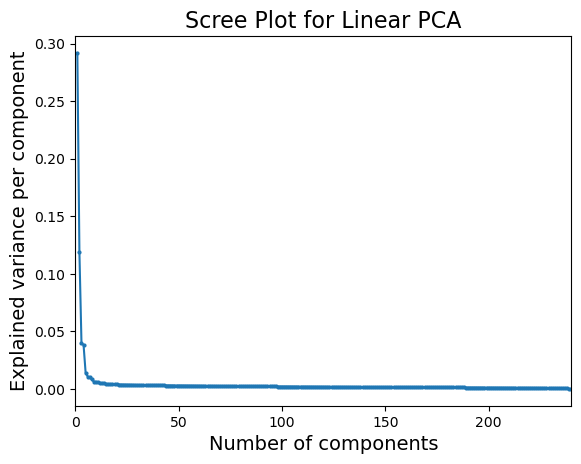

In [15]:
fig, ax = plt.subplots()
size=14
ax.plot(np.arange(1,var_ratios.shape[0]+1), var_ratios, marker='o', markersize=2)

ax.set_title('Scree Plot for Linear PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Explained variance per component', fontsize=size)

ax.set_xlim(0,sc_intensities.shape[0])
# ax.set_ylim(summary.total_var[0],1)

In [16]:
summary

,n_components,total_var
0,2.0,0.410434
1,3.0,0.450109
2,5.0,0.502678
3,20.0,0.589379
4,50.0,0.682872
5,100.0,0.802753
6,150.0,0.892990
7,200.0,0.963411
8,240.0,1.000000


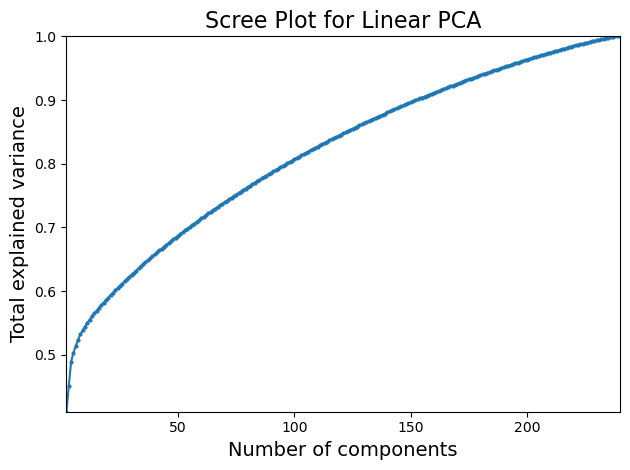

In [17]:
fig, ax = plt.subplots()
size=14
# ax.plot(summary.n_components, summary.total_var, marker='o')
ax.plot(np.arange(1,241), np.cumsum(var_ratios), marker='o', markersize=2)

ax.set_title('Scree Plot for Linear PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Total explained variance', fontsize=size)

ax.set_xlim(2,sc_intensities.shape[0])
ax.set_ylim(summary.total_var[0],1)

fig.tight_layout()

In [18]:
# pd.DataFrame(pca.components_) # make HEATMAP (Pearson's correlation) along first 5 PCs and filter out mist important features

In [19]:
le = LabelEncoder()
le.fit(base['label'])
print(list(le.classes_))
y = le.transform(base['label'])
# y

['Lemon', 'Lime', 'Orange', 'Tomato']


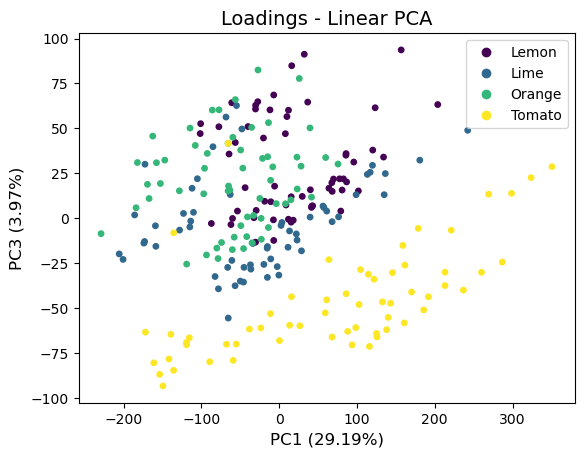

In [20]:
fig, ax = plt.subplots()
size = 12
ix = 0
iy = 2

scat = ax.scatter(x[:,ix],x[:,iy], c=y,s=15)
ax.legend(scat.legend_elements()[0], le.classes_)
ax.set_title('Loadings - Linear PCA', fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

plt.show()

# lemon and lime are not very separable - makes sense
# show in report perhaps

In [21]:
# # need 3D plot - not really useful
# fig = plt.figure(figsize=(8,8))
# ax = plt.axes(projection='3d')

# scat = ax.scatter3D(x[:,0],x[:,1],x[:,2], c=y)
# ax.legend(scat.legend_elements()[0], le.classes_)

# # ax.scatter3D(x[:,0],x[:,1],x[:,2], c=y)

# b = 10 # boundary
# # ax.set_xlim(x[:,0].min()-b, x[:,0].max()+b)
# # ax.set_ylim(x[:,1].min()-b, x[:,1].max()+b)
# # ax.set_zlim(x[:,2].min()-b, x[:,2].max()+b)


# plt.show()

In [22]:
# tomato is most separable - makes sense, it's not a citrus fruit

## K-means clustering

In [23]:
n_pc = 150 # number of PCs selected
c = 4# number of clusters
kmeans4 = KMeans(n_clusters=c, random_state=0, n_init=100)
kmeans4.fit(x[:,0:n_pc])
# kmeans4.fit(x[:,1:n_pc])
centroids4 = kmeans4.cluster_centers_


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
# x[:,0:n_pc].shape

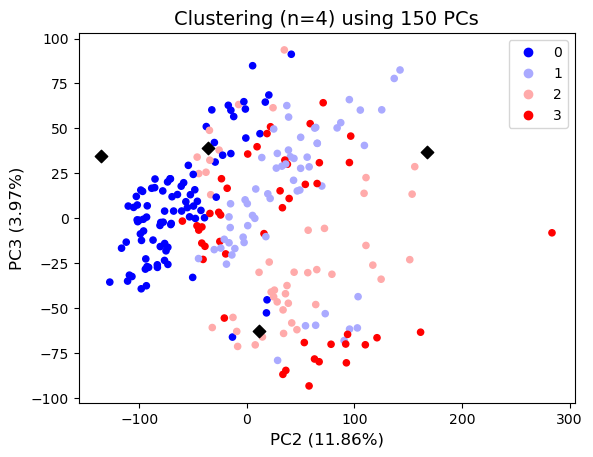

In [25]:
fig, ax = plt.subplots()
size = 12
ix = 1
iy = 2
s=20

scat = ax.scatter(x[:,ix],x[:,iy], c=kmeans4.labels_, cmap='bwr',s=20) # copper
# ax.legend(scat.legend_elements()[0], kmeans2.labels_)
ax.legend(scat.legend_elements()[0], set(kmeans4.labels_))

ax.set_title('Clustering (n={}) using {} PCs'.format(c, n_pc), fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

ax.scatter(centroids4[:,0], centroids4[:,1], color='black', s=s*2, marker='D')

plt.show()

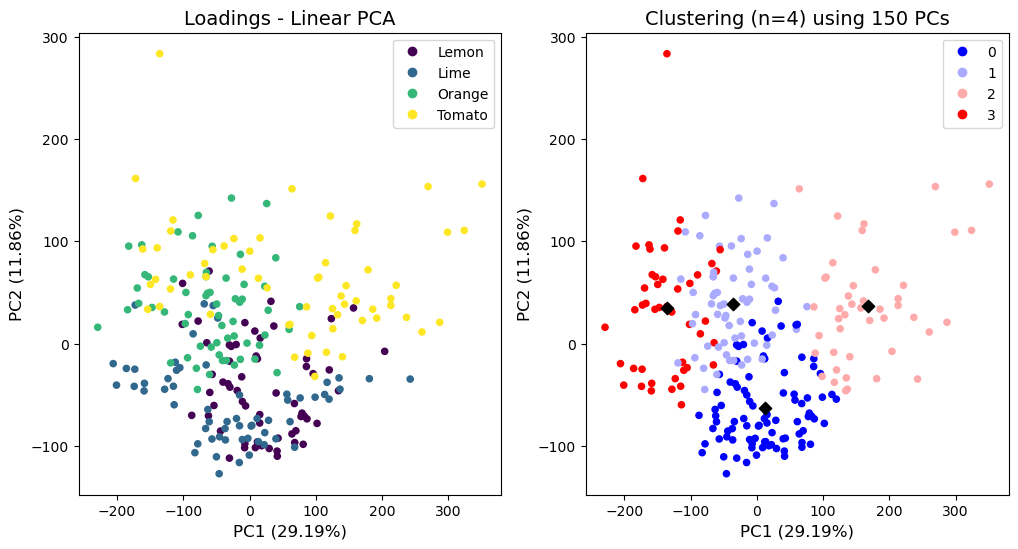

In [26]:
# side to side clusters vs reality
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))

size = 12
ix = 0
iy = 1
s=20

#left
scat0 = ax0.scatter(x[:,ix],x[:,iy], c=y, s=s)
ax0.legend(scat0.legend_elements()[0], le.classes_)
ax0.set_title('Loadings - Linear PCA', fontsize=size+2)

ax0.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax0.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

#right
scat1 = ax1.scatter(x[:,ix],x[:,iy], c=kmeans4.labels_, s=s, cmap='bwr') # copper, cmap='bwr'
ax1.legend(scat1.legend_elements()[0], set(kmeans4.labels_))

ax1.set_title('Clustering (n={}) using {} PCs'.format(c, n_pc), fontsize=size+2)

ax1.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax1.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

ax1.scatter(centroids4[:,0], centroids4[:,1], color='black', s=s*2, marker='D')

plt.show()

plt.show()

In [27]:
# once initial analysis is done
# need to plot mean cluster variance vs no of clusters
# calculate the Silhouette coeff. for what?

In [28]:
# testing sensitivity to n_pc
# let's use mean Silhouette score
number_pcs = [2,3,5,10,50,100,150,200,240]
average_silh_scores = []

for n_pc in number_pcs:
    data = x[:,:n_pc]
    # data = x[:,1:n_pc]

    kmeans4 = KMeans(n_clusters=4)
    kmeans4_labels = kmeans4.fit_predict(data)

    silhouette_avg = silhouette_score(data,kmeans4_labels)
    # print("For {} PCs the mean Silhouette score is {:.3f}".format(n_pc,silhouette_avg))
    average_silh_scores.append(silhouette_avg)

pc_sensitivity = pd.DataFrame([pd.Series(number_pcs),pd.Series(average_silh_scores)]).T
# pc_sensitivity = pd.DataFrame([pd.Series(number_pcs)-1,pd.Series(average_silh_scores)]).T
pc_sensitivity.columns = ['PCs','Mean Silhouette coeff']
pc_sensitivity

c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_

,PCs,Mean Silhouette coeff
0,2.0,0.378039
1,3.0,0.328722
2,5.0,0.309213
3,10.0,0.269642
4,50.0,0.201838
5,100.0,0.159716
6,150.0,0.132887
7,200.0,0.114656
8,240.0,0.101259


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=2 the average silhouette_score is 0.250


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=3 the average silhouette_score is 0.201


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=4 the average silhouette_score is 0.202


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=5 the average silhouette_score is 0.156


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=6 the average silhouette_score is 0.156


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=7 the average silhouette_score is 0.178


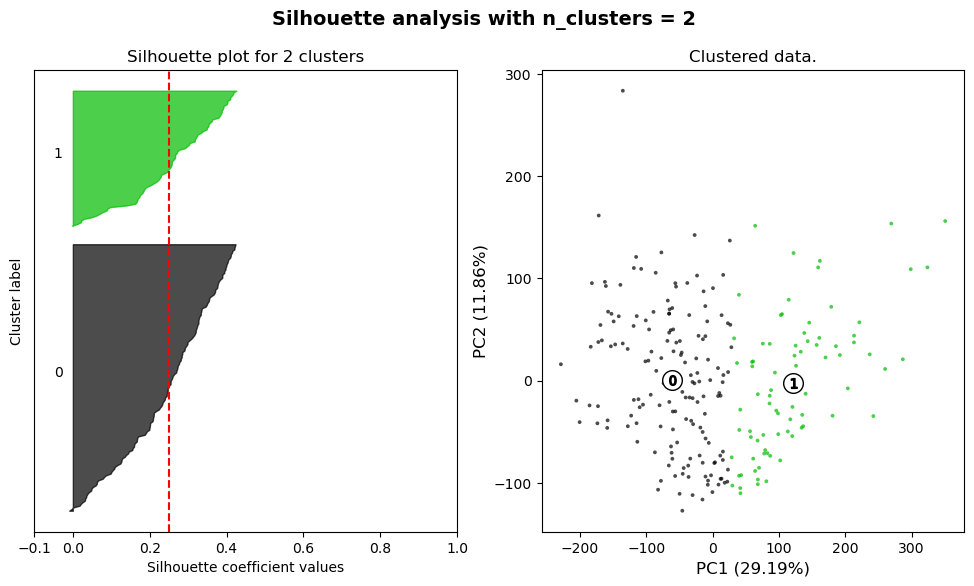

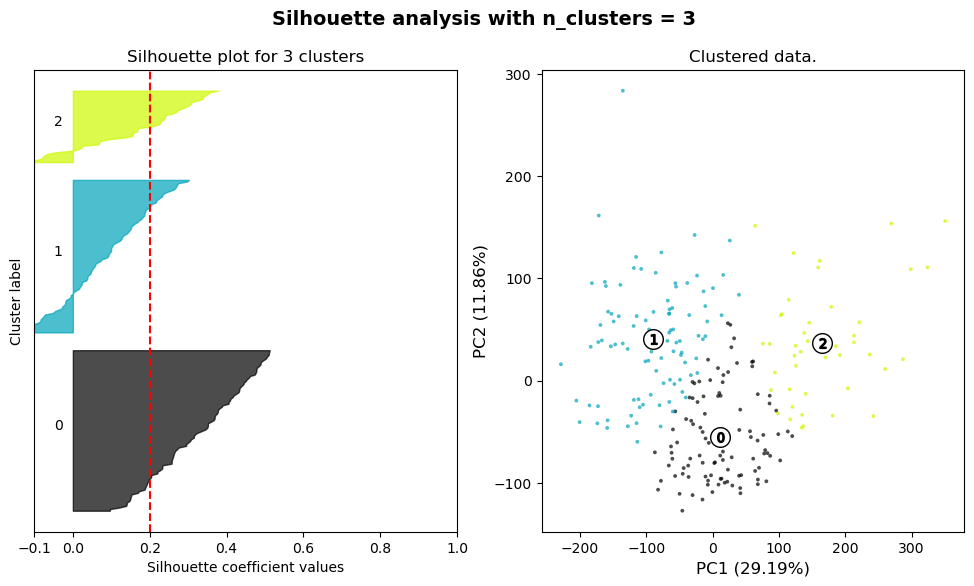

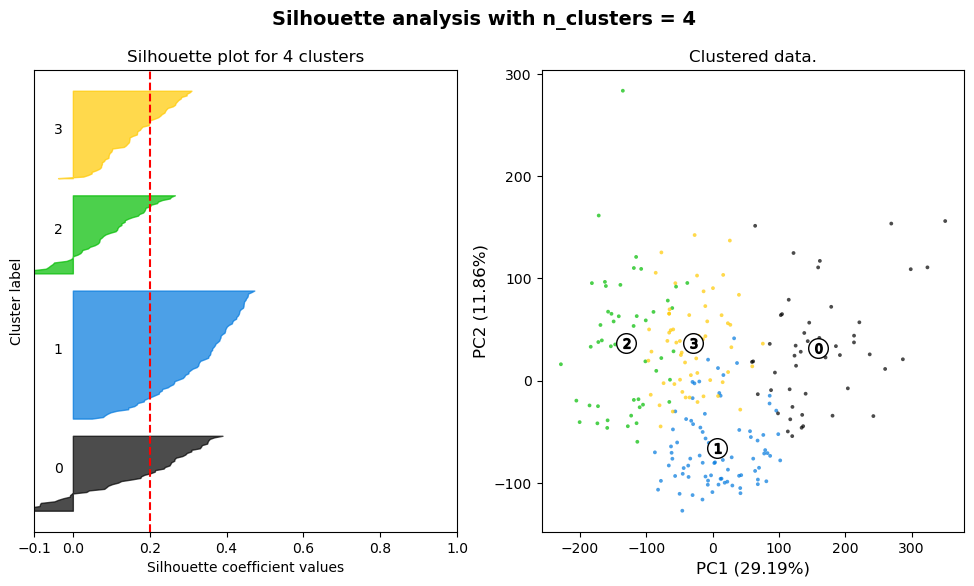

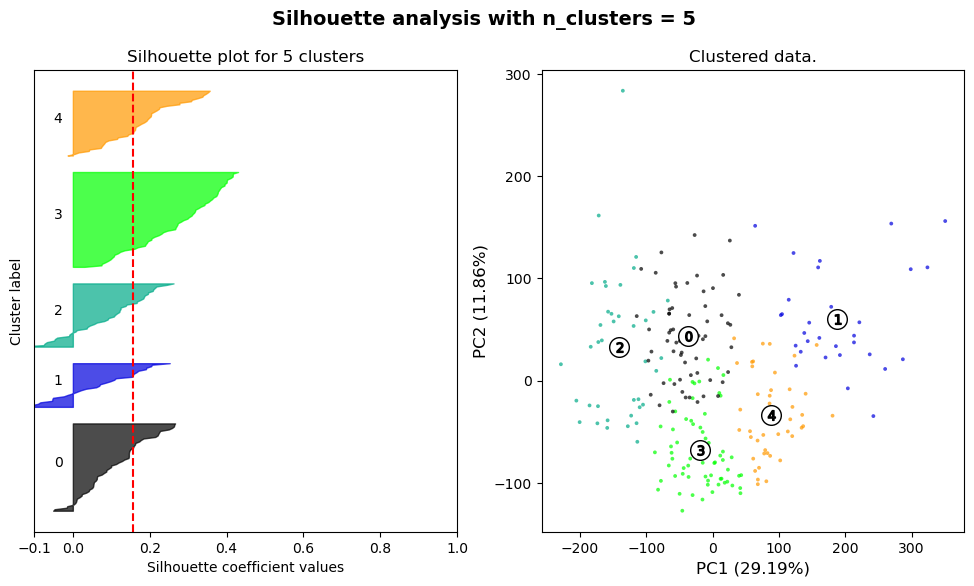

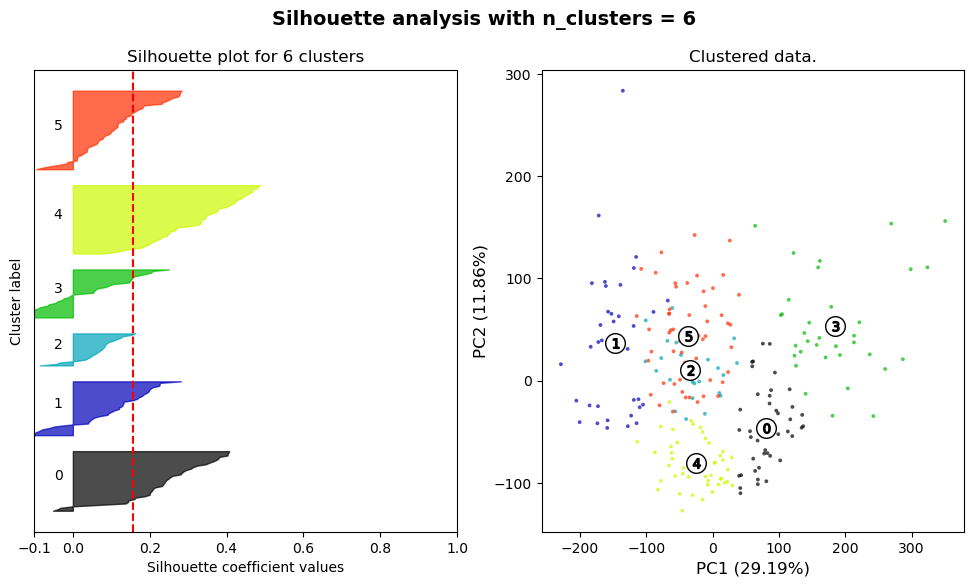

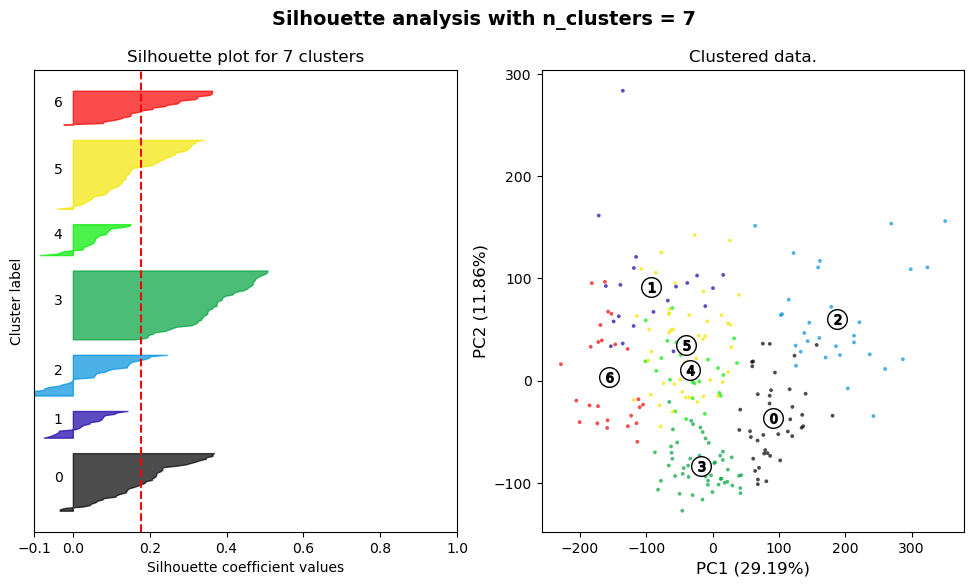

In [29]:
# testing the range of clusters
# source
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2,3,4,5,6,7]
n_pc = 50
ix = 0
iy = 1
k_sensitivities = []

data = x[:,:n_pc]
# data = x[:,1:n_pc]

for n_clusters in range_n_clusters:
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,6))

    ax0.set_xlim(-0.1,1)
    # ax0.set_ylim()

    clusterer = KMeans(n_clusters=n_clusters) #, n_init='auto', random_state=0)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    k_sensitivities.append(silhouette_avg)
    print('For n_clusters={} the average silhouette_score is {:.3f}'.format(n_clusters, silhouette_avg))

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silh_vals = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silh_vals.sort()

        size_cluster_i = ith_cluster_silh_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        colour = cm.nipy_spectral(float(i)/n_clusters)
        ax0.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silh_vals,facecolor=colour,edgecolor=colour,alpha=0.7)
        ax0.text(-0.05, y_lower+0.5*size_cluster_i,str(i))
        y_lower = y_upper+10

    ax0.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax0.set_xlabel('Silhouette coefficient values')
    ax0.set_ylabel('Cluster label')

    ax0.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax0.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    ax0.set_yticks([])

    # right
    colours = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax1.scatter(x[:,ix],x[:,iy],marker='.',s=30,lw=00,alpha=0.7,c=colours,edgecolors='k')
    centroids = clusterer.cluster_centers_

    ax1.scatter(centroids[:,0], centroids[:,1],marker='o',c='white',alpha=1,s=200,edgecolors='k')
    for i, cl in enumerate(centroids):
        ax1.scatter(cl[0],cl[1],marker="$%d$" % i,alpha=1,s=50,edgecolors='k')

    ax1.set_title("Clustered data.")
    ax1.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
    ax1.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

    plt.suptitle("Silhouette analysis with n_clusters = %d" % n_clusters,fontsize=14,fontweight="bold")

plt.show()

In [30]:
sixc = pd.DataFrame([range_n_clusters,k_sensitivities]).T
sixc.columns = ['k','Mean Silhouette coeff']
sixc

,k,Mean Silhouette coeff
0,2.0,0.249695
1,3.0,0.200806
2,4.0,0.201993
3,5.0,0.156331
4,6.0,0.156204
5,7.0,0.178179


In [31]:
# stop

# Supervised Leaning

In [32]:
# easily separable pair: orange-tomato
n_pc=100
data = pd.DataFrame(x[:,:n_pc])
data['target'] = y
data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,16.094147,5.408856,84.887254,42.785535,-14.562536,-26.989947,-30.688838,-17.008658,-29.245275,-9.175016,...,0.854101,-5.905754,4.712631,-9.094339,-5.172199,-12.995038,7.001008,-1.544132,-3.408860,0
1,156.798562,34.840072,93.669533,38.550391,5.551359,-31.788089,-14.253383,-24.698600,10.096775,2.989515,...,7.042587,4.552211,5.082221,-3.671016,8.540483,-0.736971,-6.484306,-2.863594,3.919931,0
2,-30.298452,-17.184604,62.859901,40.401261,10.867192,-18.722606,3.788874,-8.694436,-28.887579,-27.212490,...,-5.973995,7.484505,-20.114698,0.774160,-21.078751,5.646930,-9.684003,8.354222,-0.135437,0
3,-11.845835,-32.489293,60.313828,31.705150,31.549590,-21.023309,-9.289107,-21.877088,-20.383246,-21.556171,...,-5.370001,4.188463,3.618365,-9.641329,4.409887,5.668800,-10.869276,-4.566070,14.043754,0
4,11.927999,-14.788651,60.120589,43.083812,44.589319,-3.595940,-12.316007,-33.688483,-19.234371,-0.658623,...,1.962045,14.370990,1.858940,-9.622807,-10.114190,-17.017072,-11.871155,3.568616,17.729136,0


In [33]:
print(le.classes_)
# le.inverse_transform([0,1,2,3])
# so lemon=0, lime=1, orange=2,tomato=3

['Lemon' 'Lime' 'Orange' 'Tomato']


In [34]:
# lemon and lime
nonsep_data = data[data.target<2] # non-separable
# orange and tomato
sep_data = data[data.target>1] # separable

### Separable case

In [35]:
sep_data.sample(5)
# sep_data.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
139,28.115863,32.607736,29.012885,-50.356866,-3.161260,6.610064,-2.596851,9.640242,2.236719,-6.167138,...,-9.001435,15.521230,11.452301,5.149179,-8.864015,13.978892,0.296460,-6.730611,9.651559,2
222,125.095483,34.181104,-64.076561,-11.592540,-24.279725,-3.924362,-23.942062,0.226129,-19.581990,15.669598,...,1.257609,1.985001,-1.349125,9.671142,0.278415,-11.200475,11.999015,10.708743,-5.131912,3
148,-147.079775,35.353879,32.359156,-27.024323,-5.113868,-16.649109,20.295202,-6.870368,-11.975733,5.168338,...,7.501887,-11.423045,0.606270,-14.685243,3.016654,-2.476765,25.533181,-7.599677,-1.583141,2
207,-55.304896,91.884352,-69.966412,41.135010,-0.160061,-20.589150,-3.506627,-2.908884,8.894056,-10.209794,...,-2.063425,-5.020096,10.988523,-6.506824,4.890735,-6.369068,-2.513129,-14.212148,-3.367803,3
157,14.997011,-1.568848,10.254163,-78.105019,14.957854,20.160889,-14.303761,2.073735,14.174451,-10.750538,...,5.180601,-1.625961,7.462289,3.492657,5.471734,2.656419,-9.377686,-6.131093,2.258565,2


In [36]:
# building SVM for separable case
train_sep_X, test_sep_X, train_sep_y, test_sep_y = train_test_split(sep_data.iloc[:,:-1], sep_data.target, test_size=0.3,random_state=4)
print(train_sep_X.shape, test_sep_X.shape, train_sep_y.shape, test_sep_y.shape)

(84, 100) (36, 100) (84,) (36,)


In [37]:
test_sep_y.value_counts() # almost 50:50 distribution, great

2    19
3    17
Name: target, dtype: int64

In [38]:
# need to scale again probably
sc = StandardScaler()
sc_train_sep_X = sc.fit_transform(train_sep_X)
sc_test_sep_X = sc.transform(test_sep_X)

In [39]:
svc_sep = SVC(kernel='linear')
svc_sep.fit(sc_train_sep_X,train_sep_y)

SVC(kernel='linear')

In [40]:
pred_sep = svc_sep.predict(test_sep_X)
acc = accuracy_score(test_sep_y, pred_sep)
f1 = f1_score(test_sep_y, pred_sep, pos_label=2) # need to decide which one is true positive -> 2=orange, 3=tomato 

print(acc, f1)

1.0 1.0


In [41]:
# examine effect of C
cs = [0.001,0.1,0.5,1,3]
accuracies = []
f1s = []
precisions = []
recalls = []

for c in cs:
    clf = SVC(kernel='linear', C=c)
    clf.fit(sc_train_sep_X,train_sep_y)
    pred_sep = clf.predict(test_sep_X)

    acc = accuracy_score(test_sep_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_sep_y, pred_sep, pos_label=2)
    f1s.append(f1)
    prec = precision_score(test_sep_y,pred_sep, pos_label=2)
    precisions.append(prec)
    rec = recall_score(test_sep_y,pred_sep, pos_label=2)
    recalls.append(rec)

summary = pd.DataFrame([cs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['C','Accuracy','F1 score','Precision','Recall']
summary

,C,Accuracy,F1 score,Precision,Recall
0,0.001,1.0,1.0,1.0,1.0
1,0.100,1.0,1.0,1.0,1.0
2,0.500,1.0,1.0,1.0,1.0
3,1.000,1.0,1.0,1.0,1.0
4,3.000,1.0,1.0,1.0,1.0


In [42]:
# change size of train set, keep test set const
full_size = 70
red_size1 = 50
red_size2 = 30
train_sample_size = train_sep_X.shape[0]

split2 = int(train_sample_size*red_size1/full_size)
split1 = int(train_sample_size*red_size2/full_size)
print(split1, split2)

36 60


In [43]:
splits = [split1, split2, train_sample_size]
accuracies = []
f1s = []
precisions = []
recalls = []

for split in splits:
    sample_indices = train_sep_X.sample(split).index
    train_X = train_sep_X.loc[sample_indices]
    train_y = train_sep_y.loc[sample_indices]
    test_X = test_sep_X
    test_y = test_sep_y

    clf = SVC(kernel='linear',C=1)
    clf.fit(train_X, train_y)
    pred_sep = clf.predict(test_X)

    acc = accuracy_score(test_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_y, pred_sep, pos_label=2)
    f1s.append(f1)
    prec = precision_score(test_y,pred_sep, pos_label=2)
    precisions.append(prec)
    rec = recall_score(test_y,pred_sep, pos_label=2)
    recalls.append(rec)

summary = pd.DataFrame([splits,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#Training samples','Accuracy','F1 score','Precision','Recall']
summary

# still separable

,#Training samples,Accuracy,F1 score,Precision,Recall
0,36.0,1.0,1.0,1.0,1.0
1,60.0,1.0,1.0,1.0,1.0
2,84.0,1.0,1.0,1.0,1.0


In [44]:
# use rbf and investigate effect of C and size of train set + investigate gamma too
gammas = [1e-6,1e-5,1e-4,1e-3,0.01,0.1,1,5,10]
accuracies = []
f1s = []
precisions = []
recalls = []

for gamma in gammas:
    clf = SVC(kernel='rbf', C=1, gamma=gamma)
    clf.fit(sc_train_sep_X,train_sep_y)
    pred_sep = clf.predict(test_sep_X)

    acc = accuracy_score(test_sep_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_sep_y, pred_sep, pos_label=3)
    f1s.append(f1)
    prec = precision_score(test_sep_y,pred_sep, pos_label=3)
    precisions.append(prec)
    rec = recall_score(test_sep_y,pred_sep, pos_label=3)
    recalls.append(rec)

summary = pd.DataFrame([gammas,accuracies,f1s, precisions, recalls]).T
summary.columns = ['Gamma','Accuracy','F1 score','Precision','Recall']
summary


,Gamma,Accuracy,F1 score,Precision,Recall
0,0.000001,0.472222,0.641509,0.472222,1.0
1,0.000010,0.472222,0.641509,0.472222,1.0
2,0.000100,0.472222,0.641509,0.472222,1.0
3,0.001000,0.472222,0.641509,0.472222,1.0
4,0.010000,0.472222,0.641509,0.472222,1.0
5,0.100000,0.472222,0.641509,0.472222,1.0
6,1.000000,0.472222,0.641509,0.472222,1.0
7,5.000000,0.472222,0.641509,0.472222,1.0
8,10.000000,0.472222,0.641509,0.472222,1.0


In [45]:
# test_sep_y
pred_sep
# why

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Non-separable case

In [46]:
nonsep_data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
48,79.173006,-67.976140,4.021222,5.244938,15.233627,6.600939,-0.169637,1.063866,-6.297993,3.242213,...,5.040629,-0.965978,-2.092978,-0.289637,8.191305,10.539700,0.369315,3.384278,-5.420428,0
84,-159.098709,-46.269573,-4.184727,43.479887,-15.673382,0.190382,23.648970,1.670837,8.041671,-8.638109,...,-17.524906,36.404101,-10.351014,-0.059686,-2.402468,-8.025626,15.730776,-16.670755,-12.001856,1
41,40.047747,-48.299490,15.860222,-1.762885,27.012670,23.556380,-35.812780,-27.805603,18.539156,9.326425,...,4.506429,9.047251,0.931559,-6.443765,5.557002,-6.883075,-3.999845,-13.306869,8.265893,0
51,101.784619,-78.067098,15.216900,-11.061905,11.868706,-11.189433,-0.857582,-8.576865,9.816510,18.575749,...,1.163586,4.055920,0.023782,13.289081,-3.338847,1.090072,-5.870013,-3.735994,2.022865,0
39,-7.034142,-97.818087,-12.326978,3.507401,6.233106,12.648282,-8.102880,-4.490323,-17.632415,1.236420,...,-1.658469,1.722118,-5.188768,4.346160,-1.337166,-1.399254,-1.926287,6.411791,2.480758,0


In [47]:
train_nonsep_X, test_nonsep_X, train_nonsep_y, test_nonsep_y = train_test_split(nonsep_data.iloc[:,:-1], nonsep_data.target, test_size=0.3,random_state=4)
print(train_nonsep_X.shape, test_nonsep_X.shape, train_nonsep_y.shape, test_nonsep_y.shape)

(84, 100) (36, 100) (84,) (36,)


In [48]:
test_nonsep_y.value_counts()

0    19
1    17
Name: target, dtype: int64

In [49]:
sc = StandardScaler()
sc_train_nonsep_X = sc.fit_transform(train_nonsep_X)
sc_test_nonsep_X = sc.transform(test_nonsep_X)

In [50]:
# train_nonsep_X.shape

In [51]:
# nonsep case
# examine effect of C
cs = [0.001,0.01,0.05,0.06,0.1,1,5,10,1e-2]
accuracies = []
f1s = []
precisions = []
recalls = []

for c in cs:
    clf = SVC(kernel='linear', C=c)
    clf.fit(sc_train_nonsep_X,train_nonsep_y)
    pred_nonsep = clf.predict(test_nonsep_X)

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([cs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['C','Accuracy','F1 score','Precision','Recall']
summary


,C,Accuracy,F1 score,Precision,Recall
0,0.001,0.944444,0.947368,0.947368,0.947368
1,0.010,0.944444,0.947368,0.947368,0.947368
2,0.050,0.944444,0.947368,0.947368,0.947368
3,0.060,0.916667,0.918919,0.944444,0.894737
4,0.100,0.916667,0.918919,0.944444,0.894737
5,1.000,0.916667,0.918919,0.944444,0.894737
6,5.000,0.916667,0.918919,0.944444,0.894737
7,10.000,0.916667,0.918919,0.944444,0.894737
8,0.010,0.944444,0.947368,0.947368,0.947368


In [52]:
# need to VISUALISE, e.g., compare C=0.1 and C=5

Text(0.5, 1.0, 'A')

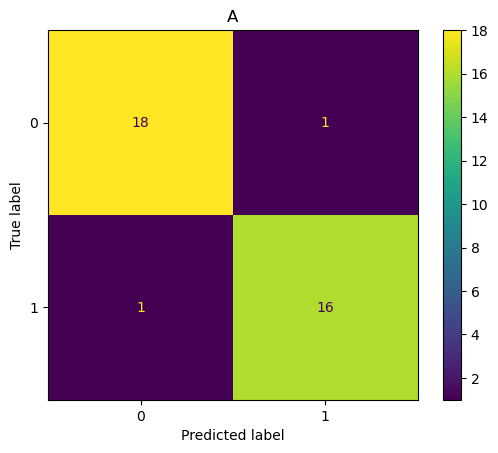

In [53]:
conf_mat = confusion_matrix(test_nonsep_y,pred_nonsep,labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
display.plot()
plt.title('A')

In [54]:
# nonsep case
# varied train set size
splits = [split1,split2, train_sample_size, split1]
accuracies = []
f1s = []
precisions = []
recalls = []

for split in splits:
    sample_indices = train_nonsep_X.sample(split).index
    train_X = train_nonsep_X.loc[sample_indices]
    train_y = train_nonsep_y.loc[sample_indices]
    test_X = test_nonsep_X
    test_y = test_nonsep_y

    clf = SVC(kernel='linear',C=1)
    clf.fit(train_X, train_y)
    pred_nonsep = clf.predict(test_X)

    acc = accuracy_score(test_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([splits,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#Training samples','Accuracy','F1 score','Precision','Recall']
summary

,#Training samples,Accuracy,F1 score,Precision,Recall
0,36.0,0.944444,0.947368,0.947368,0.947368
1,60.0,0.944444,0.944444,1.000000,0.894737
2,84.0,0.916667,0.914286,1.000000,0.842105
3,36.0,0.916667,0.923077,0.900000,0.947368


Text(0.5, 1.0, 'A')

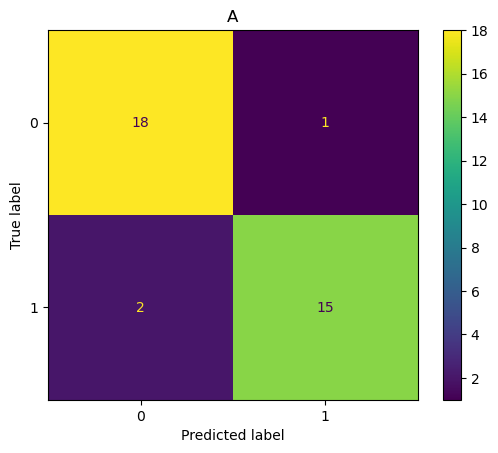

In [55]:
conf_mat = confusion_matrix(test_nonsep_y,pred_nonsep,labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
display.plot()
plt.title('A')

In [56]:
# let's study the effect of the no of PCs here
no_pcs =[2,3,5,10,20,50,100]
accuracies = []
f1s = []
precisions = []
recalls = []

pos_label = 2


for npc in no_pcs:
    # train_nonsep_X, test_nonsep_X, train_nonsep_y, test_nonsep_y = train_test_split(nonsep_data.iloc[:,:npc], nonsep_data.target, test_size=0.3,random_state=4)

    # sc = StandardScaler()
    # sc_train_nonsep_X = sc.fit_transform(train_nonsep_X)
    # sc_test_nonsep_X = sc.transform(test_nonsep_X)

    clf = SVC(kernel='linear', C=0.01)
    clf.fit(sc_train_nonsep_X[:,0:npc],train_nonsep_y)
    pred_nonsep = clf.predict(sc_test_nonsep_X[:,0:npc])

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([no_pcs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#PCs','Accuracy','F1 score','Precision','Recall']
summary

c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,#PCs,Accuracy,F1 score,Precision,Recall
0,2.0,0.472222,0.000000,0.000000,0.000000
1,3.0,0.694444,0.645161,0.833333,0.526316
2,5.0,0.916667,0.923077,0.900000,0.947368
3,10.0,0.972222,0.972973,1.000000,0.947368
4,20.0,1.000000,1.000000,1.000000,1.000000
5,50.0,0.916667,0.918919,0.944444,0.894737
6,100.0,0.916667,0.923077,0.900000,0.947368


In [57]:
# nonsep case
# examine effect of gamme, use rbf kernel
gammas = [0.001,0.01,0.1,1,3,5,10]
accuracies = []
f1s = []
precisions = []
recalls = []

for gamma in gammas:
    clf = SVC(kernel='rbf', C=1, gamma=gamma)
    clf.fit(sc_train_nonsep_X,train_nonsep_y)
    pred_nonsep = clf.predict(test_nonsep_X)

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([gammas,accuracies,f1s, precisions, recalls]).T
summary.columns = ['Gamma','Accuracy','F1 score','Precision','Recall']
summary


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages

,Gamma,Accuracy,F1 score,Precision,Recall
0,0.001,0.527778,0.690909,0.527778,1.0
1,0.010,0.527778,0.690909,0.527778,1.0
2,0.100,0.472222,0.000000,0.000000,0.0
3,1.000,0.472222,0.000000,0.000000,0.0
4,3.000,0.472222,0.000000,0.000000,0.0
5,5.000,0.472222,0.000000,0.000000,0.0
6,10.000,0.472222,0.000000,0.000000,0.0


In [58]:
pred_nonsep
# rbf kernel still thinks that there is only one label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
# stop

## Polynomial

In [60]:
# polynomial kernel PCA
# n_components=2
# kpca = KernelPCA(kernel='poly', degree=3, n_components=n_components)
# kpc_poly_intensities = kpca.fit_transform(sc_intensities)


In [61]:
# summary for poly
comps = [200]#,3,5,20,50,100,150,200,240] # 10,15,20,25
# variances = []
degree = 4
for n_c in comps:
    kpca = KernelPCA(kernel='poly', n_components=None, degree=degree) # default degree is 3
    poly_x = kpca.fit_transform(sc_intensities)

    expl_var = np.var(poly_x, axis=0)
    variances  = expl_var / np.sum(expl_var)
    
    
    # variances.append(expl_var_ratio) # FIX

summary = pd.DataFrame([np.arange(1,variances.shape[0]+1), variances]).T
summary.columns = ['n_components','total_var']
summary

,n_components,total_var
0,1.0,0.206584
1,2.0,0.155148
2,3.0,0.053767
3,4.0,0.038137
4,5.0,0.033458
...,...,...
233,234.0,0.000355
234,235.0,0.000348
235,236.0,0.000342
236,237.0,0.000339


(0.0, 0.20658366586286403)

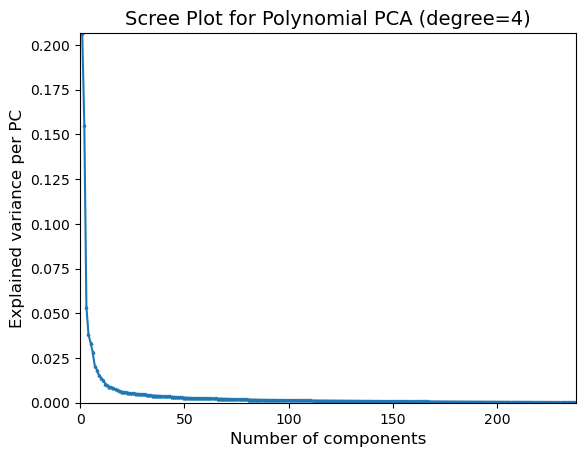

In [62]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, summary.total_var, marker='^', markersize=2)

ax.set_title('Scree Plot for Polynomial PCA (degree={})'.format(degree), fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Explained variance per PC', fontsize=size)

ax.set_xlim(0,summary.n_components.max())
ax.set_ylim(0, summary.total_var.max())

(0.20658366586286403, 1.0)

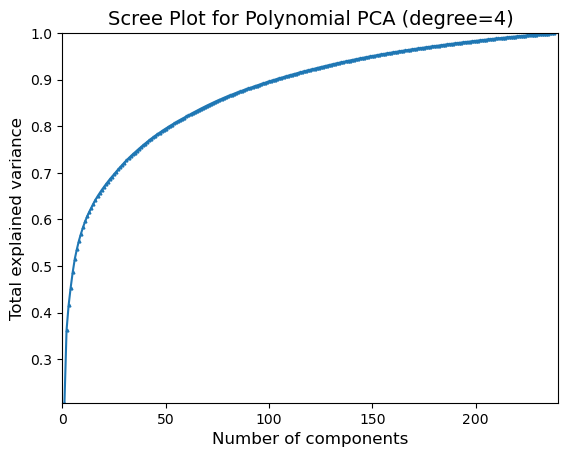

In [63]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, np.cumsum(summary.total_var), marker='^', markersize=2)

ax.set_title('Scree Plot for Polynomial PCA (degree={})'.format(degree), fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Total explained variance', fontsize=size)

ax.set_xlim(0,sc_intensities.shape[0])
ax.set_ylim(summary.total_var[0],1)

In [64]:
np.cumsum(summary.total_var)

0      0.206584
1      0.361732
2      0.415499
3      0.453636
4      0.487093
         ...   
233    0.998654
234    0.999003
235    0.999344
236    0.999684
237    1.000000
Name: total_var, Length: 238, dtype: float64

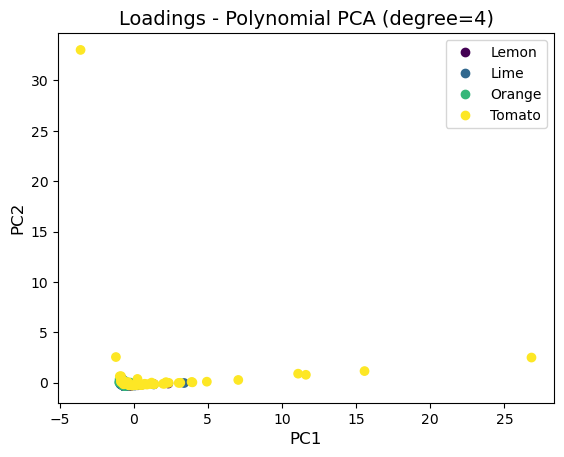

In [65]:
fig, ax = plt.subplots()
size = 12
ix = 0
iy = 1

scat = ax.scatter(poly_x[:,ix],poly_x[:,iy], c=y)
ax.legend(scat.legend_elements()[0], le.classes_)
ax.set_title('Loadings - Polynomial PCA (degree={})'.format(degree), fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1), fontsize=size)
ax.set_ylabel('PC'+str(iy+1), fontsize=size)

# ax.set_xlim(-1,2.2)
# ax.set_ylim(-3,2)

plt.show()

# lemon and lime are not very separable - makes sense
# show in report perhaps

## RBF

In [66]:
# summary for poly
comps = [200]#,3,5,20,50,100,150,200,240] # 10,15,20,25
# variances = []
for n_c in comps:
    kpca = KernelPCA(kernel='rbf', n_components=None)
    rbf_x = kpca.fit_transform(sc_intensities)

    expl_var = np.var(rbf_x, axis=0)
    variances  = expl_var / np.sum(expl_var)
    
    
    # variances.append(expl_var_ratio) # FIX

summary = pd.DataFrame([np.arange(1,variances.shape[0]+1), variances]).T
summary.columns = ['n_components','total_var']
summary

,n_components,total_var
0,1.0,0.072535
1,2.0,0.063997
2,3.0,0.033132
3,4.0,0.020356
4,5.0,0.016074
...,...,...
233,234.0,0.001851
234,235.0,0.001832
235,236.0,0.001807
236,237.0,0.001673


(0.0, 0.07253517914160383)

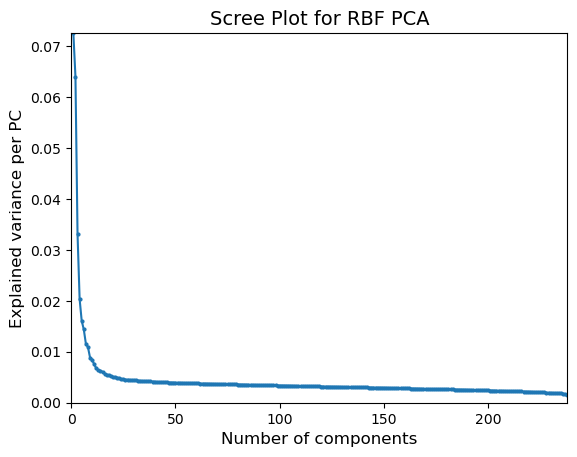

In [67]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, summary.total_var, marker='o', markersize=2)

ax.set_title('Scree Plot for RBF PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Explained variance per PC', fontsize=size)

ax.set_xlim(0,summary.n_components.max())
ax.set_ylim(0, summary.total_var.max())

(0.07253517914160383, 1.0)

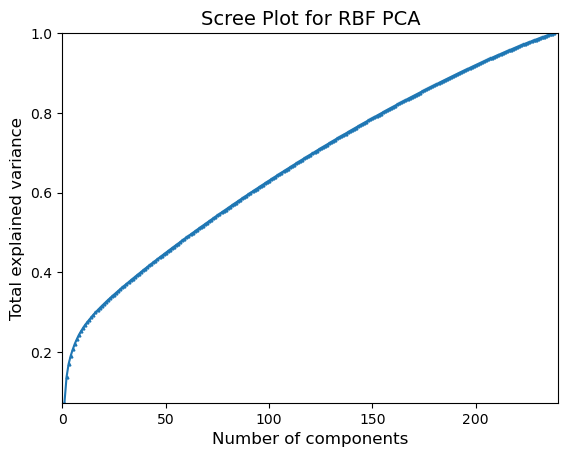

In [68]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, np.cumsum(summary.total_var), marker='^', markersize=2)

ax.set_title('Scree Plot for RBF PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Total explained variance', fontsize=size)

ax.set_xlim(0,sc_intensities.shape[0])
ax.set_ylim(summary.total_var[0],1)

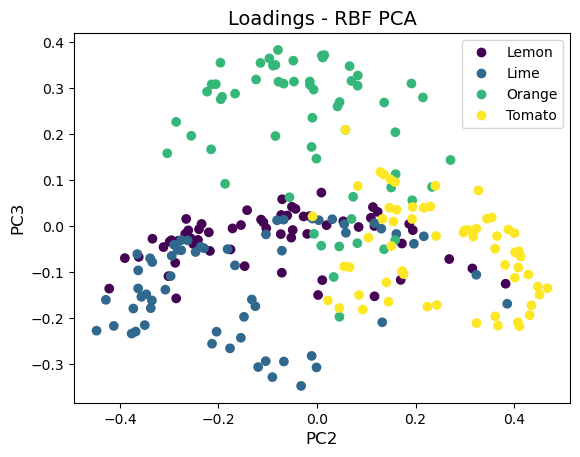

In [69]:
fig, ax = plt.subplots()
size = 12
ix = 1
iy = 2

scat = ax.scatter(rbf_x[:,ix],rbf_x[:,iy], c=y)
ax.legend(scat.legend_elements()[0], le.classes_)
ax.set_title('Loadings - RBF PCA'.format(degree), fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1), fontsize=size)
ax.set_ylabel('PC'+str(iy+1), fontsize=size)

# ax.set_xlim(-1,2.2)
# ax.set_ylim(-3,2)

plt.show()

# lemon and lime are not very separable - makes sense
# show in report perhaps